<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 1

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Problems in Machine Learning

### Problem 1.1

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

### Problem 1.4

In [44]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='fall24', homework=1):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [45]:
import pickle

# retrieve is defined in a hidden cell
file_name = 'points.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    points = pickle.load(file)

sigma, min_size = 2, 5

Using previously downloaded file points.pkl


In [46]:
points[0]

array([-9.18107175,  4.43503692])

In [47]:
import numpy as np

def g(m, x, sig=2):
    return np.exp(-((np.linalg.norm(x - m)) ** 2) / (2 * (sig ** 2)))

In [48]:
def denominator(points, m, sig=2):
    d = []
    for x in points:
        d.append(g(m, x, sig))
    denominator = sum(d)
    return denominator

In [49]:
def step(m, t, sigma):
    numerator_sum = np.zeros_like(m)
    denom = denominator(t, m, sigma)
    
    for x in t:
        w_x = g(m, x, sigma) / denom
        numerator_sum += w_x * x
    
    return numerator_sum

In [50]:
def seek(m_old, t, sigma=2, max_iter=100):
    m_old = np.array(m_old)
    epoch = 0
    distance = np.inf  
    while epoch < max_iter and distance >= sigma / 10:
        m_new = step(m_old, t, sigma)
        distance = np.linalg.norm(m_new - m_old)
        m_old = m_new
        epoch += 1
    return m_new     

In [51]:
def cluster(t, sigma=2, min_size=5):
    groups = {}
    
    for x in t:
        m_n = seek(x, t, sigma)
        m_n = tuple(m_n)
        
        sigma_radius = 0
        for mid_point in groups:
             if np.linalg.norm(np.array(m_n) - np.array(mid_point)) < sigma:
                
                new_center = tuple((np.array(mid_point) + np.array(m_n)) / 2)
                groups[new_center] = groups.pop(mid_point) 
                groups[new_center].append(x)
                sigma_radius = 1
                break
        
        if sigma_radius == 0:
            groups[m_n] = [x]
    
    nontrivial = {}
    for k, amt in groups.items():
        if len(amt) >= min_size:
            nontrivial[k] = amt
    
    return nontrivial

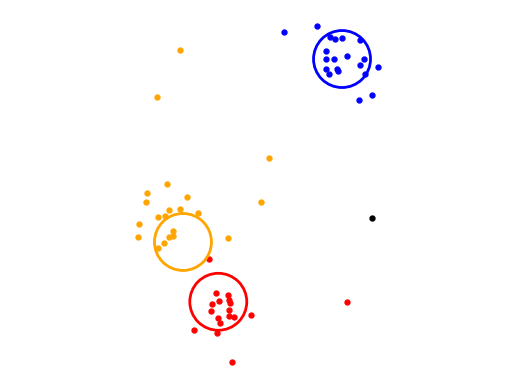

In [54]:
def plot(t, clusters, sigma):
    amt = len(clusters)
    
    fig, ax = plt.subplots()
    colors = ['red', 'blue', 'orange']
    
    for x in t:
        in_cluster = False
        for i, (centroid, points) in enumerate(clusters.items()):
            if any(np.array_equal(x, p) for p in points):
                ax.scatter(x[0], x[1], color=colors[i % 3], marker='.', s=50)
                in_cluster = True
                break
        
        if not in_cluster:
            ax.scatter(x[0], x[1], color='black', marker='.', s=50)
    
    for i, (centroid, points) in enumerate(clusters.items()):
        circle = plt.Circle((centroid[0], centroid[1]), sigma / 1.5, color=colors[i % 3], fill=False, linewidth=2)
        ax.add_patch(circle)

    plt.axis('equal')
    plt.axis('off')  
    
    plt.show()

plot(points, clusters, sigma=2)

## Part 2: Voronoi Diagrams

### Problem 2.1 (Exam Style)

### Problem 2.2 (Exam Style)

### Problem 2.3

## Part 3: Nearest-Neighbor Classification 

In [18]:
pumpkin_file_name = 'pumpkin.pkl'
retrieve(pumpkin_file_name)
with open(pumpkin_file_name, 'rb') as file:
    p = pickle.load(file)

Using previously downloaded file pumpkin.pkl


### Problem 3.1: Standardization

### Problem 3.2: Validation

### Problem 3.3: Testing

### Problem 3.4: Analysis (Exam Style)